In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("/content/drive/My Drive/Palestras/MachineLearning/Aula2/classification.csv", header=None)
data

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


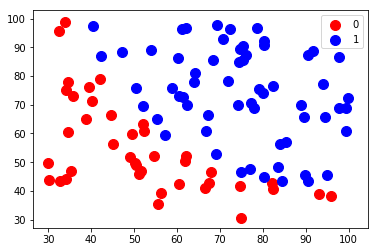

In [54]:
scatter_x = np.array(data[0])
scatter_y = np.array(data[1])
group = np.array(data[2])
cdict = {0: 'red', 1: 'blue'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()

In [0]:
X = data.values[:,:-1]
Y = data.values[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

# KNN

In [0]:
# Funções que realizam os cálculos de distância entre dois registros
def distance_euclidian(x1, x2):
    return sqrt(np.sum([abs(i - j) for i, j in zip(x1,x2)]))

def distance_manhattan(x1, x2):
    return np.sum([abs(i-j) for i, j in zip(x1,x2)])

def getClasses(y):
    return np.unique(y)

In [22]:
getClasses(y_train)

array([0., 1.])

In [0]:
# Função responsável por predizer a classe de um único registro
def predict1KNN(x, y, x_teste, k, function):
    classes = getClasses(y)
    results = [ [function(x[i], x_teste), y[i]]  for i in range(0, x.shape[0])]
    results = sorted(results)
    dictClasses = {}
    for i in classes:
        dictClasses[i] = 0
    for i in range(0, k):
        for row in dictClasses.keys():
            if results[i][1] == row:
                dictClasses[row] += 1
    
    # retornar a chave que tem maior contagem
    minimus = [results[i][1] for i in range (0,k)]
    
    contClasses = [(x, minimus.count(x)) for x in set(minimus)]

    maximo = np.argmax(contClasses, axis=0)
    
    return contClasses[maximo[1]][0]

In [31]:
predict1KNN(x_train, y_train, [60.182599, 86.308552], 3, distance_euclidian)

1.0